# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

---

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento da base**
3. **Análise do dataframe**
   - 3.1. Volumetria
   - 3.2. Tipagem, Nulos e Cardinalidade
   - 3.3. Duplicidade
   - 3.4. Medidas Estatísticas
   - 3.5. Boxplot e Outliers das Variáveis Numéricas
   - 3.6. Distribuição da Variável 'Car Purchase Amount'
4. **Análise exploratória dos dados**
   - 4.1. Qual a distribuição da idade dos clientes?
   - 4.2. O gênero dos clientes está balanceado?
   - 4.3. Há diferença de idade média entre gêneros?

5. **Insights e recomendações**

<br>

---

<br>

## 1. Importação de bibliotecas

In [50]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import textwrap
import warnings
import gc

from scipy import stats

In [25]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [26]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 1655


In [27]:
# Criando um dataframe a partir do aquivo .csv
df = pd.read_csv('dados/Car_Purchasing_Data.csv', sep=',')
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


## 3. Análise do dataframe

### 3.1. Volumetria

In [28]:
# Exibindo a quantidade de linhas e coluna do dataframe

print(f'Quantidade de linhas (registros):  {df.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df.shape[1]}')    

Quantidade de linhas (registros):  500
Quantidade de colunas (variáveis): 9


### 3.2. Tipagem, Nulos e Cardinalidade

In [29]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [30]:
# Exibindo os metadados do dataframe

gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Customer Name,object,0,0.0,498
1,Customer e-mail,object,0,0.0,500
2,Country,object,0,0.0,1
3,Gender,int64,0,0.0,2
4,Age,int64,0,0.0,43
5,Annual Salary,float64,0,0.0,500
6,Credit Card Debt,float64,0,0.0,500
7,Net Worth,float64,0,0.0,500
8,Car Purchase Amount,float64,0,0.0,500


### 3.3. Duplicidade

In [31]:
# Exibindo a quantidade de registros únicos e duplicados

contagem_duplicatas = df.duplicated().value_counts().rename(
    index={False: 'Registros únicos', True: 'Registros duplicados'})
print(contagem_duplicatas)


Registros únicos    500
Name: count, dtype: int64


### 3.4. Medidas Estatísticas

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.224000,7.990339,20.0,41.000000,46.000000,52.000000,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [33]:
df.describe(exclude=('float','int')).T

,count,unique,top,freq
Customer Name,500,498,Seth,2
Customer e-mail,500,500,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,1
Country,500,1,USA,500


### 3.5. Boxplot e Outliers das Variáveis Numéricas

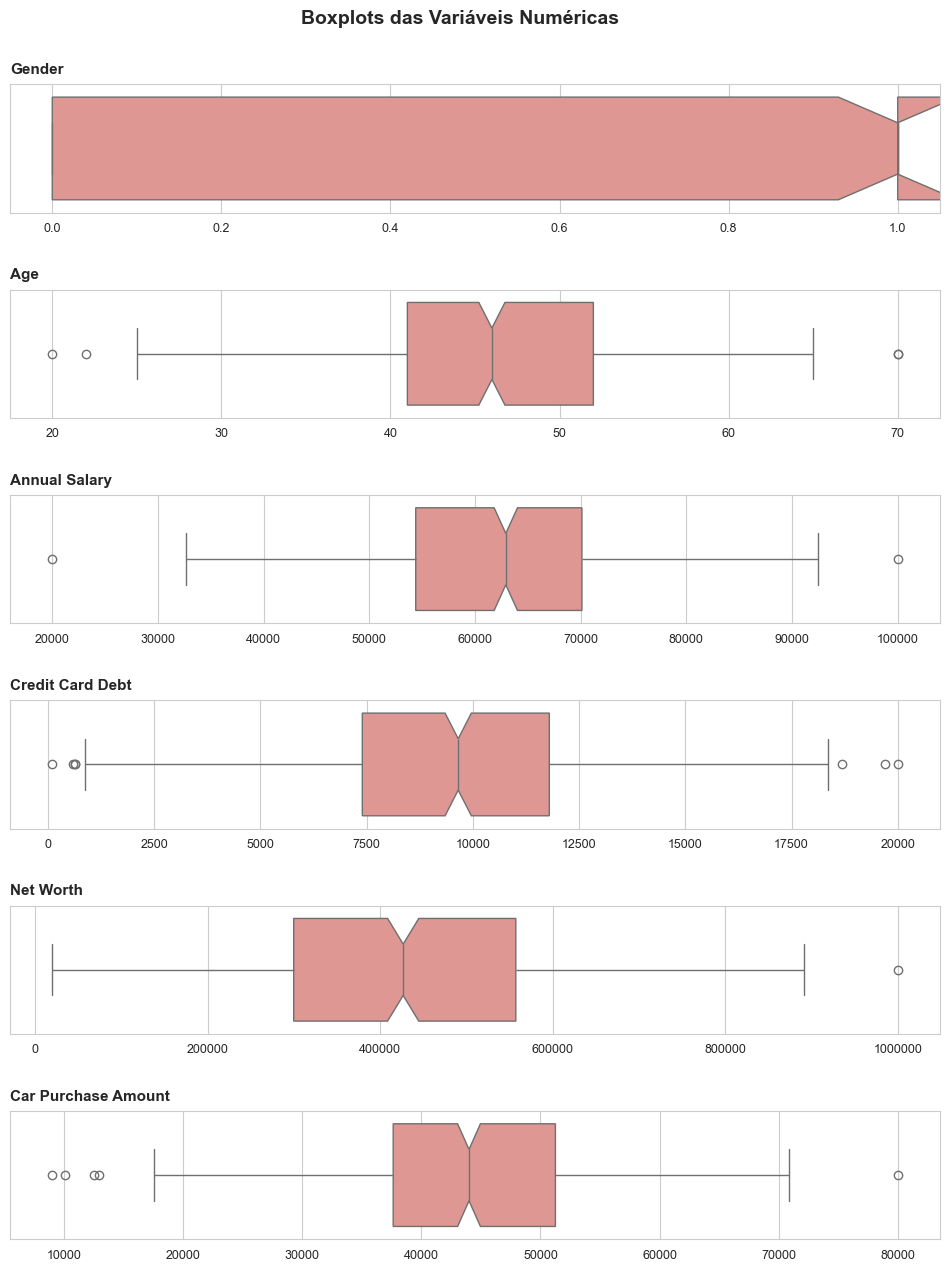

In [80]:
# Seleciona os nomes das colunas numéricas (float apenas)
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Verifica se há colunas numéricas
if not colunas_numericas:
    print('Nenhuma variável numérica encontrada no DataFrame.')
else:
    # Número de boxplots a serem gerados
    n_plots = len(colunas_numericas)

    # Cria a figura com subplots verticais
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2.5 * n_plots), 
                            gridspec_kw={'hspace': 0.6})

    # Garante que axs seja sempre uma lista (mesmo com 1 gráfico)
    if n_plots == 1:
        axs = [axs]

    # Loop pelas colunas para criar os boxplots
    for ax, col in zip(axs, colunas_numericas):
        sns.boxplot(x=df[col], ax=ax, notch=True, color='#ea8c87', orient='h')
        ax.set_title(f'{col}', loc='left', fontsize=11, pad=8, fontweight='bold')
        ax.set(xlabel='', ylabel='')
        ax.tick_params(labelsize=9)
        ax.ticklabel_format(style='plain', axis='x')

    # Ajusta o layout e adiciona título geral
    fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=14, fontweight='bold', y=0.93)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # evita sobreposição com título
    plt.show()


In [35]:
# Seleciona as variáveis numéricas
colunas_numericas = df.select_dtypes(include=['number'])

# Lista para armazenar as informações de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df[col] < limite_inferior).sum()
    outliers_acima = (df[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df.shape[0]
    
    # Armazena resultados em um dicionário
    resultados_outliers.append({
        'Variável': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicionários em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Variável (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))


Resumo dos Outliers por Variável (ordenado por maior %)


,Variável,IIQ,Limite Inferior,Limite Superior,Outliers Abaixo,Outliers Acima,Total Outliers,% Outliers
0,Credit Card Debt,4401.351696,795.488248,18400.895031,4,3,7,1.4
1,Car Purchase Amount,13624.813477,17192.675824,71691.929734,4,1,5,1.0
2,Age,11.000000,24.500000,68.500000,2,2,4,0.8
3,Annual Salary,15725.884810,30803.149980,93706.689220,1,1,2,0.4
4,Net Worth,257500.282825,-86426.228337,943574.902962,0,1,1,0.2
5,Gender,1.000000,-1.500000,2.500000,0,0,0,0.0


### 3.6. Distribuição da Variável 'Car Purchase Amount'

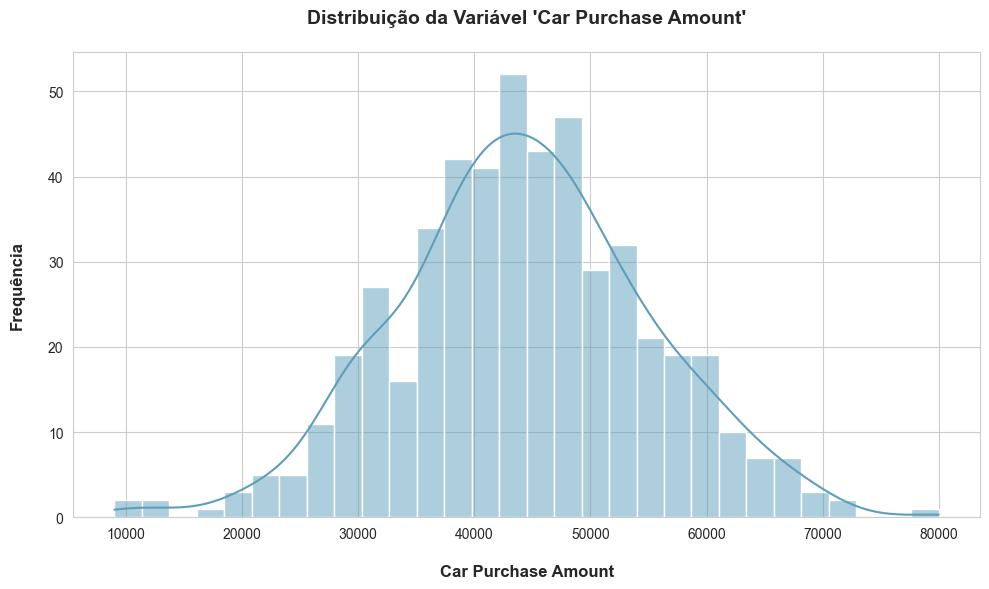

In [90]:
# Ajuste de tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com KDE
sns.histplot(data=df, x='Car Purchase Amount', bins=30, kde=True, color='#5d9eba', edgecolor='#ffffff')

# Título e labels
plt.title('Distribuição da Variável \'Car Purchase Amount\'\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCar Purchase Amount', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Exibe o gráfico
plt.tight_layout()
plt.show()


In [37]:
def testar_normalidade(dataframe, coluna):
    '''
    Realiza testes estatísticos de normalidade (Shapiro-Wilk e D’Agostino-Pearson)
    para a variável numérica especificada.

    :param dataframe: DataFrame
        DataFrame contendo os dados a serem analisados.
    :param coluna: str
        Nome da coluna numérica a ser testada.
    :return: None
        Exibe os resultados dos testes e interpretação.
    '''

    # Remove valores ausentes da amostra
    amostra = dataframe[coluna].dropna()

    # Teste de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(amostra)

    # Teste de D’Agostino-Pearson
    dagostino_stat, dagostino_p = stats.normaltest(amostra)

    # Exibição dos resultados
    print(f'\n📌 Teste de Normalidade — {coluna}\n')
    print(f'- Shapiro-Wilk:       Estatística = {shapiro_stat:.4f} | p-valor = {shapiro_p:.4f}')
    print(f'- D\'Agostino-Pearson: Estatística = {dagostino_stat:.4f} | p-valor = {dagostino_p:.4f}\n')

    # Interpretação
    if shapiro_p > 0.05 and dagostino_p > 0.05:
        print('✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).')
    else:
        print('⚠️ A variável não apresenta distribuição normal (rejeita H₀ em pelo menos um teste).')


In [38]:
testar_normalidade(df, 'Car Purchase Amount')


📌 Teste de Normalidade — Car Purchase Amount

- Shapiro-Wilk:       Estatística = 0.9972 | p-valor = 0.5566
- D'Agostino-Pearson: Estatística = 1.2039 | p-valor = 0.5477

✅ A variável apresenta distribuição normal (não rejeita H₀ nos dois testes).


## 4. Análise exploratória dos dados

### 4.1. Qual a distribuição da idade dos clientes?

In [41]:
# Agrupar idades numéricas em faixas etárias

# Faixas etárias (limites)
bins = [0, 24, 34, 44, 54, 64, 74, 84, 94, 150]

# Agrupar idades numéricas em faixas etárias
labels = [
    'menos de 25 anos',
    '25 a 34 anos',
    '35 a 44 anos',
    '45 a 54 anos',
    '55 a 64 anos',
    '65 a 74 anos',
    '75 a 84 anos',
    '85 a 94 anos',
    'mais de 95 anos'
]

# Criando a coluna de faixa etária
df['AGE_GROUP'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

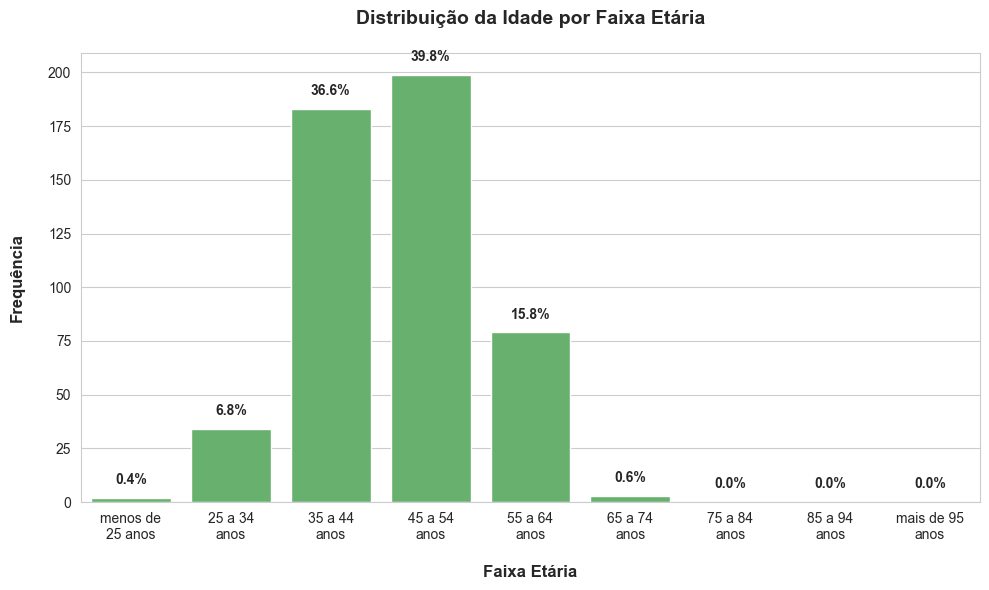

In [ ]:
# Conta a frequência de cada faixa etária
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Calcula o total para o percentual
total = age_group_counts.sum()

# Usa textwrap para quebrar automaticamente os rótulos longos do eixo x
x_labels = [textwrap.fill(label, width=10) for label in age_group_counts.index.astype(str)]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(
    x=x_labels,
    y=age_group_counts.values,
    palette=['#5cbc64'],
    edgecolor='#ffffff'
)

# Título e labels
plt.title('Distribuição da Idade por Faixa Etária\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Etária', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(age_group_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count + total * 0.01, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


### 4.2. O gênero dos clientes está balanceado?

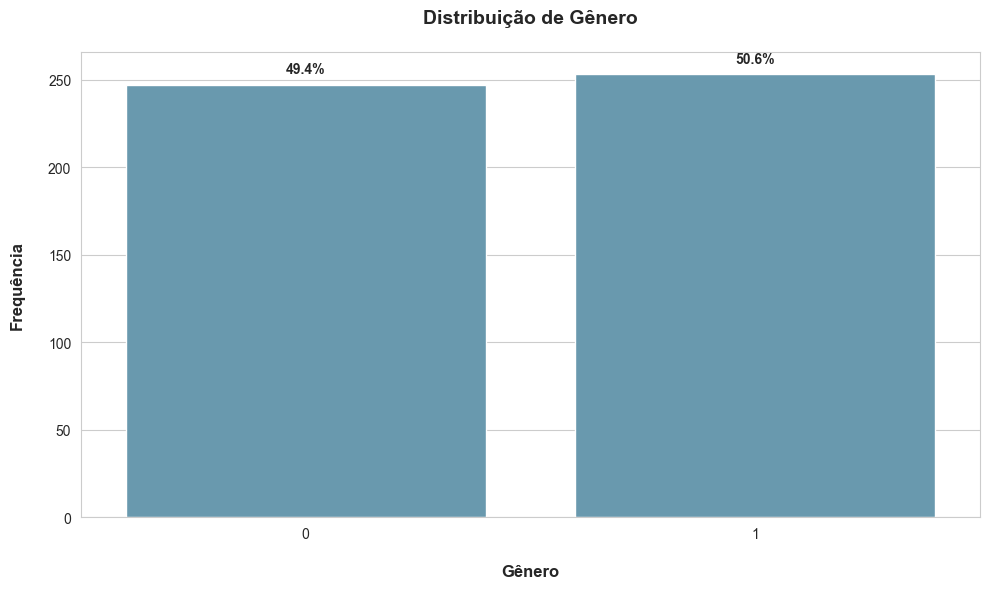

In [82]:
# Conta a frequência de cada gênero
gender_counts = df['Gender'].value_counts().sort_index()

# Calcula o total para o percentual
total = gender_counts.sum()

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do barplot
ax = sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette=['#5d9eba'],
    edgecolor='#ffffff'
)

# Título e labels
plt.title('Distribuição de Gênero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nGênero', fontsize=12, fontweight='bold')
plt.ylabel('Frequência\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(gender_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count + total * 0.01, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

### 4.3. Há diferença de idade média entre gêneros?

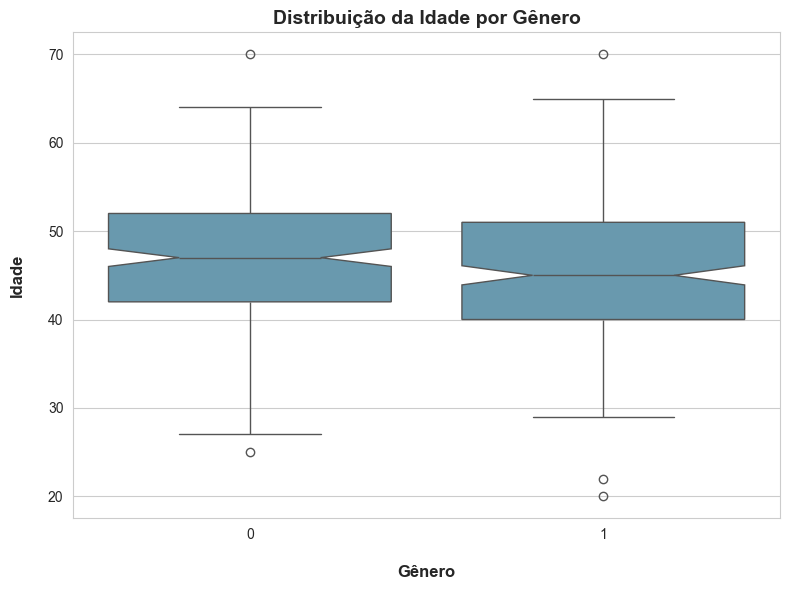

In [87]:
# Ajuste do tamanho da figura
plt.figure(figsize=(8, 6))

# Criação do boxplot
sns.boxplot(data=df, x='Gender', y='Age', notch=True, palette=['#5d9eba'])

# Título e labels
plt.title('Distribuição da Idade por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('\nGênero', fontsize=12, fontweight='bold')
plt.ylabel('Idade\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()
